<a href="https://colab.research.google.com/github/asrenninger/urbansim/blob/main/automl/automl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install mljar-supervised

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.6/130.6 kB 3.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 20.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 535.7/535.7 kB 44.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 413.4/413.4 kB 33.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 23.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 346.6/346.6 kB 31.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 63.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 10.0 MB/s eta 0:00:00
  Created wheel for mljar-supervised: filename=mljar_supervise

In [2]:
import pandas as pd
import numpy as np

from supervised.automl import AutoML

In [32]:
%matplotlib inline

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv("drive/MyDrive/urbansim/migration.csv")

In [5]:
df.columns

Index(['code_i', 'code_j', 'F_ij', 'distance', 'name_i', 'name_j', 'density_i',
       'married_i', 'households_i', 'population_i', 'nonwhite_i',
       'unhealthy_i', 'employed_i', 'university_i', 'density_j', 'married_j',
       'households_j', 'population_j', 'nonwhite_j', 'unhealthy_j',
       'employed_j', 'university_j'],
      dtype='object')

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    df[df.columns[3:]], df["F_ij"], test_size=0.25
)

automl = AutoML(results_path="drive/MyDrive/urbansim/automl", mode='Explain')
automl.fit(X_train, y_train)

Linear algorithm was disabled.
AutoML directory: drive/MyDrive/urbansim/automl
The task is regression with evaluation metric rmse
AutoML will use algorithms: ['Baseline', 'Decision Tree', 'Random Forest', 'Xgboost', 'Neural Network']
AutoML will ensemble available models
AutoML steps: ['simple_algorithms', 'default_algorithms', 'ensemble']
* Step simple_algorithms will try to check up to 2 models
1_Baseline rmse 121.835677 trained in 0.56 seconds
2_DecisionTree rmse 85.113257 trained in 13.3 seconds
* Step default_algorithms will try to check up to 3 models


/usr/local/lib/python3.10/dist-packages/supervised/preprocessing/scale.py:33: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.20943578  6.80883001 -0.07053261 ... -0.15826093 -0.20212509
 -0.17288231]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.


3_Default_Xgboost rmse 69.616028 trained in 5.11 seconds


/usr/local/lib/python3.10/dist-packages/supervised/preprocessing/scale.py:33: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.20943578  6.80883001 -0.07053261 ... -0.15826093 -0.20212509
 -0.17288231]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
/usr/local/lib/python3.10/dist-packages/supervised/preprocessing/scale.py:33: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.73134378 -0.32150792  0.12731694 ...  1.29807022 -1.11464797
 -0.80222574]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
/usr/local/lib/python3.10/dist-packages/supervised/preprocessing/scale.py:33: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.56686143 -0.47612571  0.5198764  ...  0.18297612 -0.46020989
  1.62638416]

4_Default_NeuralNetwork rmse 78.350832 trained in 10.09 seconds


/usr/local/lib/python3.10/dist-packages/supervised/utils/learning_curves.py:113: FutureWarning: The behavior of Series.argmax/argmin with skipna=False and NAs, or with all-NAs is deprecated. In a future version this will raise ValueError.
/usr/local/lib/python3.10/dist-packages/supervised/preprocessing/scale.py:33: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.20943578  6.80883001 -0.07053261 ... -0.15826093 -0.20212509
 -0.17288231]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.


5_Default_RandomForest rmse 76.380339 trained in 16.15 seconds
* Step ensemble will try to check up to 1 model
Ensemble rmse 65.94702 trained in 0.28 seconds
AutoML fit time: 53.78 seconds
AutoML best model: Ensemble


AutoML(results_path='drive/MyDrive/urbansim/automl')

In [12]:
y_pred = automl.predict(X_test)

/usr/local/lib/python3.10/dist-packages/supervised/preprocessing/scale.py:33: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.32132738 -0.46973991  1.63596443 ... -0.34010364 -0.81560932
 -0.94388761]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
/usr/local/lib/python3.10/dist-packages/supervised/preprocessing/scale.py:33: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.68551224 -0.58100622 -0.57680101 ... -0.23106902 -0.03251148
 -0.46446971]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.


In [51]:
from sklearn.metrics import mean_absolute_percentage_error, median_absolute_error, r2_score
print(mean_absolute_percentage_error(y_test, y_pred))
print(median_absolute_error(y_test, y_pred))
print(r2_score(y_test, y_pred))

1.9874398419973232
6.264500414139448
0.6576773703623421


In [48]:
y_eval = pd.DataFrame({'y_pred': y_pred, 'y_test': y_test})
y_eval['quantile'] = pd.qcut(y_eval['y_test'], 10, duplicates='drop')
y_eval['quantile'] = y_eval['quantile'].apply(lambda x: x.mid)

<ipython-input-49-d808a1b20bc8>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


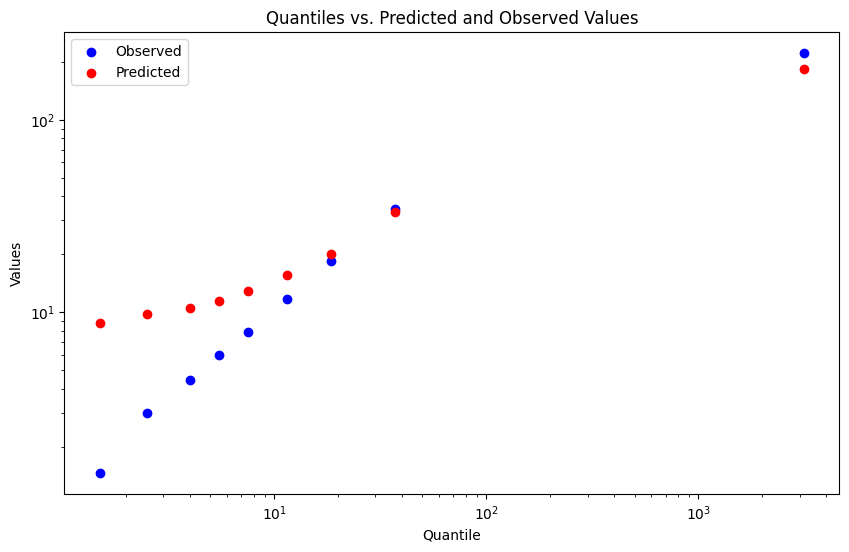

In [49]:
y_tile = y_eval.groupby('quantile', as_index=False).agg({'y_pred': 'mean', 'y_test': 'mean'})

import matplotlib.pyplot as plt
# Sort the DataFrame by decile for plotting
y_tile.sort_values('quantile', inplace=True)

# Create a figure and an axes instance
fig, ax = plt.subplots(figsize=(10, 6))

# Scatter plot for observed values on ax
ax.scatter(y_tile['quantile'], y_tile['y_test'], color='blue', label='Observed')

# Scatter plot for predicted values on ax
ax.scatter(y_tile['quantile'], y_tile['y_pred'], color='red', label='Predicted')

# Adding labels and legend using ax methods
ax.set_xlabel('Quantile')
ax.set_ylabel('Values')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_title('Quantiles vs. Predicted and Observed Values')
ax.legend()

# Show plot
plt.show()

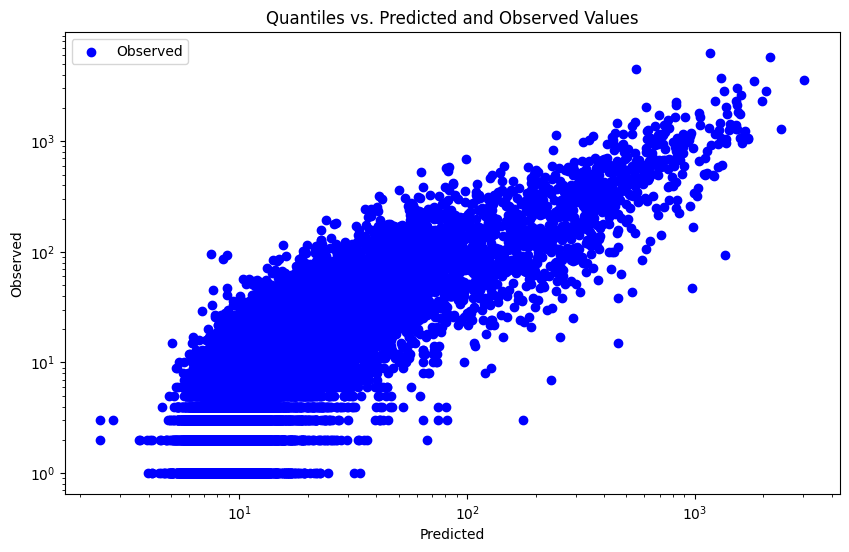

In [52]:
import matplotlib.pyplot as plt
# Sort the DataFrame by decile for plotting
y_eval.sort_values('quantile', inplace=True)

# Create a figure and an axes instance
fig, ax = plt.subplots(figsize=(10, 6))

# Scatter plot for observed values on ax
ax.scatter(y_eval['y_pred'], y_eval['y_test'], color='blue', label='Observed')

# Adding labels and legend using ax methods
ax.set_xlabel('Predicted')
ax.set_ylabel('Observed')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_title('Quantiles vs. Predicted and Observed Values')
ax.legend()

# Show plot
plt.show()